# CPV attribute + 1 more

Only the cpv attribute and an additional one are used

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from collection import Collection

In [2]:
try:
    collection
except NameError:
    collection = Collection()

In [52]:
collection.import_file('dbs/final/important3+1/auto.json', force=True)

In [53]:
df = collection.df_row_per_algorithm()
df

,acc_max,acc_mean,acc_median,acc_min,acc_quantile_25,acc_quantile_75,acc_std,algorithm,anbieter,attributes,...,fn_std,label,mcc_max,mcc_mean,mcc_median,mcc_min,mcc_quantile_25,mcc_quantile_75,mcc_std,sample_size_mean
0,82.33,74.2779,73.950,64.65,72.5600,76.2800,3.480734,gradient_boost,Alpiq AG,ausschreibung_cpv,...,5.586841,Construction,0.658069,0.506228,0.508195,0.303895,0.463482,0.546531,6.699499,215.0
1,80.93,71.9529,72.090,60.00,69.6525,74.4200,3.691138,decision_tree,Alpiq AG,ausschreibung_cpv,...,14.699558,Construction,0.616112,0.442322,0.451327,0.045083,0.395640,0.503731,8.384165,215.0
2,81.86,74.7760,74.880,65.58,72.5600,77.2100,3.447707,random_forest,Alpiq AG,ausschreibung_cpv,...,4.392513,Construction,0.655136,0.518818,0.520557,0.331002,0.478874,0.560829,6.470883,215.0
3,82.33,74.7110,74.880,64.19,73.0200,77.2100,3.509476,gradient_boost,Alpiq AG,"ausschreibung_cpv,auftragsart_art",...,7.010945,Construction,0.660877,0.514851,0.519559,0.265991,0.480353,0.558065,6.931142,215.0
4,81.40,71.4651,71.630,61.40,69.3000,73.6050,3.836907,decision_tree,Alpiq AG,"ausschreibung_cpv,auftragsart_art",...,13.872142,Construction,0.641141,0.447116,0.458245,0.208247,0.398814,0.505547,8.508139,215.0
5,82.33,75.1713,75.350,65.58,73.0200,77.6700,3.399554,random_forest,Alpiq AG,"ausschreibung_cpv,auftragsart_art",...,5.841516,Construction,0.663927,0.524639,0.529306,0.330070,0.483614,0.563315,6.668698,215.0
6,82.33,75.7296,75.810,67.91,73.3725,78.6000,3.546970,gradient_boost,Alpiq AG,"ausschreibung_cpv,beschaffungsstelle_plz",...,6.016540,Construction,0.633151,0.500659,0.501482,0.360598,0.451740,0.558013,7.041473,215.0
7,78.14,69.9256,69.770,61.40,67.4400,72.5600,3.712635,decision_tree,Alpiq AG,"ausschreibung_cpv,beschaffungsstelle_plz",...,15.655533,Construction,0.565353,0.378134,0.378966,0.196419,0.326052,0.442363,8.756024,215.0
8,82.33,75.8824,75.810,67.91,73.9500,78.6000,3.265341,random_forest,Alpiq AG,"ausschreibung_cpv,beschaffungsstelle_plz",...,5.897298,Construction,0.628925,0.502045,0.504125,0.342430,0.455442,0.555666,6.606606,215.0
9,82.33,74.7480,74.420,65.12,72.5600,76.8575,3.374506,gradient_boost,Alpiq AG,"ausschreibung_cpv,auftragsart",...,5.860147,Construction,0.658069,0.514933,0.516073,0.315373,0.473902,0.562314,6.667967,215.0


In [60]:
def to_attribute_name(x):
    try:
        return x.split(",")[1]
    except IndexError:
        return x

df['attributes'] = df['attributes'].apply(to_attribute_name)
tmpdf = df.groupby('attributes').mean()
ausschreibung_cpv_df = tmpdf.loc['ausschreibung_cpv']
tmpdf.drop('ausschreibung_cpv', axis=0, inplace=True)
tmpdf['acc_diff'] = tmpdf['acc_mean'] - ausschreibung_cpv_df['acc_mean']
tmpdf['mcc_diff'] = (tmpdf['mcc_mean'] - ausschreibung_cpv_df['mcc_mean'])*100
tmpdf

,acc_max,acc_mean,acc_median,acc_min,acc_quantile_25,acc_quantile_75,acc_std,fn_rate_max,fn_rate_mean,fn_rate_median,...,mcc_max,mcc_mean,mcc_median,mcc_min,mcc_quantile_25,mcc_quantile_75,mcc_std,sample_size_mean,acc_diff,mcc_diff
attributes,,,,,,,,,,,,,,,,,,,,,
auftragsart,94.148333,86.350983,86.841500,73.251333,84.072750,89.448250,4.262130,42.100333,10.375323,8.382167,...,0.888494,0.736212,0.744478,0.485328,0.691542,0.792116,8.189883,82.7,0.616337,1.399006
auftragsart_art,94.188667,86.249813,86.697500,72.878000,83.913500,89.119250,4.298094,41.718000,10.575920,8.642833,...,0.888496,0.733137,0.742054,0.464545,0.686300,0.790750,8.319247,82.7,0.515167,1.091527
beschaffungsstelle_plz,95.038333,86.059663,86.639833,72.151667,83.404500,89.158500,4.522807,43.832333,16.449473,15.230000,...,0.897858,0.715684,0.725687,0.456994,0.660064,0.778559,9.037669,82.7,0.325017,-0.653853
gatt_wto,94.332333,85.972350,86.805333,71.740667,83.431333,89.143333,4.555388,46.758667,14.882163,12.966667,...,0.885317,0.718331,0.731519,0.438927,0.667994,0.781383,8.875321,82.7,0.237703,-0.389093
lose,94.471000,85.215197,85.847500,70.088333,82.704583,88.479583,4.717955,48.371333,16.791417,14.456167,...,0.887188,0.703878,0.714055,0.420505,0.652051,0.768015,9.210012,82.7,-0.519450,-1.834442
sprache,94.349667,85.319763,85.609500,69.499333,82.769333,88.675917,4.741393,45.712667,15.416063,14.057500,...,0.886263,0.707165,0.713261,0.408990,0.653615,0.772661,9.189908,82.7,-0.414883,-1.505698
teilangebote,94.314000,85.709623,86.360000,69.706000,83.325417,88.942917,4.829502,49.655667,12.078523,9.625000,...,0.889760,0.722879,0.733337,0.425240,0.673959,0.786114,9.113363,82.7,-0.025023,0.065712
varianten,93.701667,85.300420,85.731833,70.206333,82.689917,88.357250,4.575968,43.721667,14.023143,11.825833,...,0.876038,0.709549,0.718582,0.428058,0.656175,0.772075,8.935983,82.7,-0.434227,-1.267349


In [65]:
pd.options.display.float_format = '{:,.2f}'.format
tmpdf[['acc_mean','acc_diff', 'mcc_mean', 'mcc_diff']]

,acc_mean,acc_diff,mcc_mean,mcc_diff
attributes,,,,
auftragsart,86.35,0.62,0.74,1.40
auftragsart_art,86.25,0.52,0.73,1.09
beschaffungsstelle_plz,86.06,0.33,0.72,-0.65
gatt_wto,85.97,0.24,0.72,-0.39
lose,85.22,-0.52,0.70,-1.83
sprache,85.32,-0.41,0.71,-1.51
teilangebote,85.71,-0.03,0.72,0.07
varianten,85.30,-0.43,0.71,-1.27


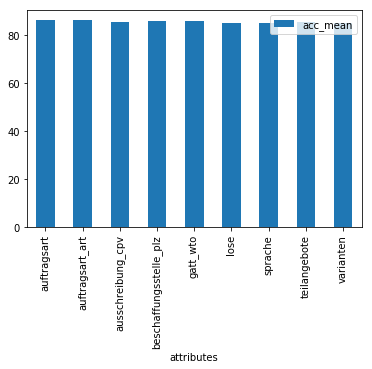

In [42]:
df.groupby(['attributes']).mean()[['acc_mean', 'mcc_mean', 'fn_rate_mean']].plot(kind='bar', y=['acc_mean'])